In [3]:
import numpy as np
from scipy import signal

In [53]:
fs = 48000
Q = 5
f0 = 2000
b, a = signal.iirpeak(f0, Q, fs)
freq, h = signal.freqz(b, a, fs=fs)

In [62]:
# compare with my coeff for peak biquad
import sys,os,os.path
sys.path.append(os.path.expanduser('../src'))

from spinorama.filter_iir import Biquad
from spinorama.filter_peq import peq_build, peq_freq, peq_print
gain=10
pk = [(1.0, Biquad(3, f0, fs, Q, gain))]
ampl = peq_build(freq, pk)

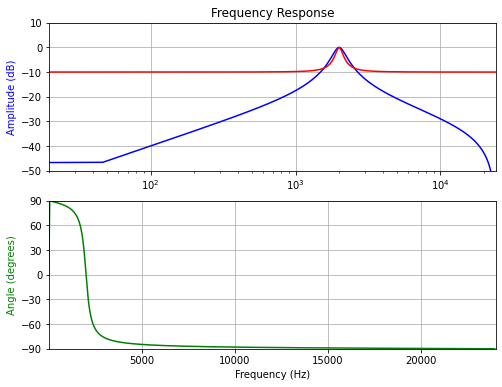

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].semilogx(freq, 20*np.log10(np.maximum(abs(h), 1e-15)), color='blue')
ax[0].semilogx(freq, ampl-gain, color='red')

ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([20, fs/2])
ax[0].set_ylim([-50, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([20, fs/2])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()
plt.show()